## Prerequisites

numpy==1.16.4  
pandas==0.25.0  
matplotlib==3.1.0  
seaborn==0.9.0

#### In this notebook you will learn the basics of the main python libraries used for data analysis: 

    - pandas
    - numpy
    - matplotlib 
    

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from nltk.corpus import stopwords

%matplotlib inline

## Working with arrays, Numpy 

In [3]:
a = np.array([1, 2, 3])   # Create a rank 1 array
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"

<class 'numpy.ndarray'>
(3,)
1 2 3


In [4]:
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"

[5 2 3]


In [5]:
b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

(2, 3)
1 2 4


In [6]:
a = np.zeros((2,2))   # Create an array of all zeros
print(a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

b = np.ones((1,2))    # Create an array of all ones
print(b)              # Prints "[[ 1.  1.]]"

c = np.full((2,2), 7)  # Create a constant array
print(c)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

d = np.eye(2)         # Create a 2x2 identity matrix
print(d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

e = np.random.random((2,2))  # Create an array filled with random values
print(e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.76931373 0.6696489 ]
 [0.57955202 0.84333134]]


In [7]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]

In [8]:
# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

2
77


### Math 

#### Elementwise operations

In [9]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

In [10]:
# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [11]:
# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [12]:
# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [13]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [14]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


#### Vectorized operations

In [15]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

In [16]:
# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


In [17]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

[29 67]
[29 67]


In [18]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


In [19]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


## Load data

Load .zip archive from this link, unzip it and place in the same folder as this notebook:  
    https://www.kaggle.com/fizzbuzz/cleaned-toxic-comments

In [20]:
# Load data 
df = pd.read_csv("train_preprocessed.csv")

In [21]:
# Explore a few lines from the table
df.head(10)

,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity
0,explanation why the edits made under my userna...,0000997932d777bf,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
1,d aww he matches this background colour i m s...,000103f0d9cfb60f,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
2,hey man i m really not trying to edit war it...,000113f07ec002fd,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
3,more i can t make any real suggestions on im...,0001b41b1c6bb37e,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
4,you sir are my hero any chance you remember...,0001d958c54c6e35,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
5,congratulations from me as well use the tool...,00025465d4725e87,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
6,cock suck before you piss around on my work,0002bcb3da6cb337,0.0,1.0,1.0,train,1.0,0.0,1.0,4.0
7,your vandalism to the matt shirvington article...,00031b1e95af7921,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
8,sorry if the word nonsense was offensive to ...,00037261f536c51d,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
9,alignment on this subject and which are contra...,00040093b2687caa,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0


In [22]:
# Same as previous, but from the end of the file, defaul number of lines = 5
df.tail() 

,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity
159566,and for the second time of asking when your ...,ffe987279560d7ff,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
159567,you should be ashamed of yourself that is a ho...,ffea4adeee384e90,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
159568,spitzer umm theres no actual article for pros...,ffee36eab5c267c9,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
159569,and it looks like it was actually you who put ...,fff125370e4aaaf3,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
159570,and i really don t think you understand i ca...,fff46fc426af1f9a,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0


#### Documentation   

Refer to the documentation from this link to find some information about working with pandas DataFrames:  
    https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.html 

Please, show which columns are available in this dataframe (For example: 'comment_text', 'id', ...):

In [23]:
for c in df.columns:
    print(c)

comment_text
id
identity_hate
insult
obscene
set
severe_toxic
threat
toxic
toxicity


Please, show the DataFrame's shape (rows, columns) 

In [24]:
print(df.shape)

(159571, 10)


Calculate how much commens are labelled as:

 1. Identity hate message 
 2. Insult message
 3. Obscene message  
etc... 
 6. Toxic message. 

In [25]:
types = ['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']
for f in types:
    print(f, ':', np.count_nonzero(df[f]))

identity_hate : 1405
insult : 7877
obscene : 8449
severe_toxic : 1595
threat : 478
toxic : 15294


## Pre-process dataset

You can make our DataFrame smaller to make it easier to work with it: 

In [26]:
df_sample = df.sample(n=1000) # random selection 
df_small = df[:100] # select the first 100 rows

In [27]:
# Check the data type
df_sample.dtypes

comment_text      object
id                object
identity_hate    float64
insult           float64
obscene          float64
set               object
severe_toxic     float64
threat           float64
toxic            float64
toxicity         float64
dtype: object

In [28]:
# Check duplicated rows and delete them if any
duplicate_rows_df = df[df.duplicated()]

print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [29]:
# Drop unnecessary columns:

df.drop(columns='set', inplace=True, errors='ignore')

## Visualizations

### Histogram plot 

In [30]:
# Count label occurences

labels = df[['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']].sum()

In [31]:
labels

identity_hate     1405.0
insult            7877.0
obscene           8449.0
severe_toxic      1595.0
threat             478.0
toxic            15294.0
dtype: float64

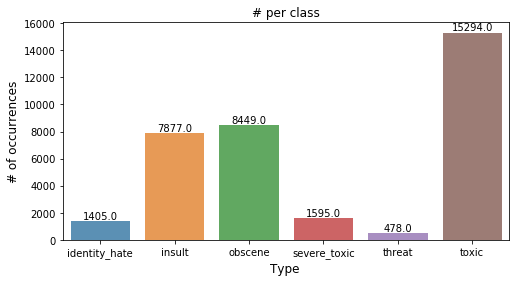

In [32]:
plt.figure(figsize = (8, 4))
ax = sns.barplot(labels.index, labels.values, alpha = 0.8)
plt.title("# per class")
plt.ylabel('# of occurrences', fontsize = 12)
plt.xlabel('Type ', fontsize = 12)

# Add text labels
rects = ax.patches
labels = labels.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha = 'center', va = 'bottom')

plt.show()

Comment what you see here: 

In [33]:
#### Your text here

### See how labels correlate with each other: 

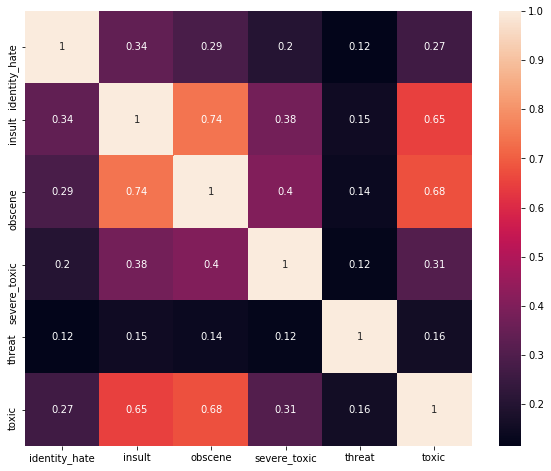

In [34]:
temp_df = df[['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']]

corr = temp_df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values, annot=True)

The above plot indicates a pattern of co-occurance. 

Comment what you see from the above picture:

In [35]:
#### Your text here

## Wordclouds

Calculate the number of the uniq words in all of the comments. (Tip: to split text on words use text.split() command, it will separate your text by space)

In [36]:
def update_freq(df, words):
    for text in df['comment_text']:
        for w in text.split():
            if w in words:
                words[w] += 1
            else:
                words[w] = 1
    return words

words = update_freq(df, {})
print(len(words))

166929


Let's work with wordclouds. 
The next task would be to select all of the words from the textual data and create a wordcloud. 
Here you can see an example of such visualisation: 

https://towardsdatascience.com/word-clouds-in-python-comprehensive-example-8aee4343c0bf 

Create the same visualization for our dataset. 
Describe what you see.

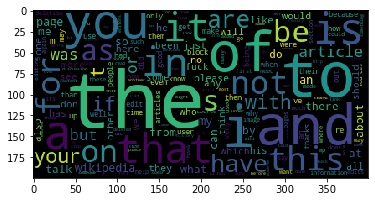

In [37]:
wc = wordcloud.WordCloud().fit_words(words)
plt.imshow(wc)

plt.show()

## Distributions

The main goal of this task is to plot words distributions for each category. 
What does it mean: 

1. You need to select words from each category (identity_hate, insult, etc.) 
2. Plot a historgram with the most popular words for each category 
3. Try to delete stop words: 
    1. Install nltk library
    2. from nltk.corpus import stopwords - in the stopwords you will see the most common stopwords 
    3. Filter them from the words for each category
4. Plot a histogram again. Has it changed? 
5. Analyse received results. 


In [38]:
words_by_cat = pd.DataFrame(columns=types, index=words.keys()).replace(np.NaN, 0)
print(words_by_cat)
for t in types:
    words_by_cat[t] = pd.Series(data=update_freq(df.loc[lambda r: r[t]==1, :], words_by_cat[t].to_dict()))
    sample = sorted(words_by_cat[t].items(), key=lambda p: p[1], reverse=True)[:10]
    print(t, ":", sample)



             identity_hate  insult  obscene  severe_toxic  threat  toxic
explanation              0       0        0             0       0      0
why                      0       0        0             0       0      0
the                      0       0        0             0       0      0
edits                    0       0        0             0       0      0
made                     0       0        0             0       0      0
...                    ...     ...      ...           ...     ...    ...
webaddress               0       0        0             0       0      0
gratest                  0       0        0             0       0      0
hanumakonda              0       0        0             0       0      0
automakers               0       0        0             0       0      0
ciu                      0       0        0             0       0      0

[166929 rows x 6 columns]
identity_hate : [('nigger', 3656), ('fuck', 3151), ('you', 2947), ('a', 2081), ('is', 1915), ('i'

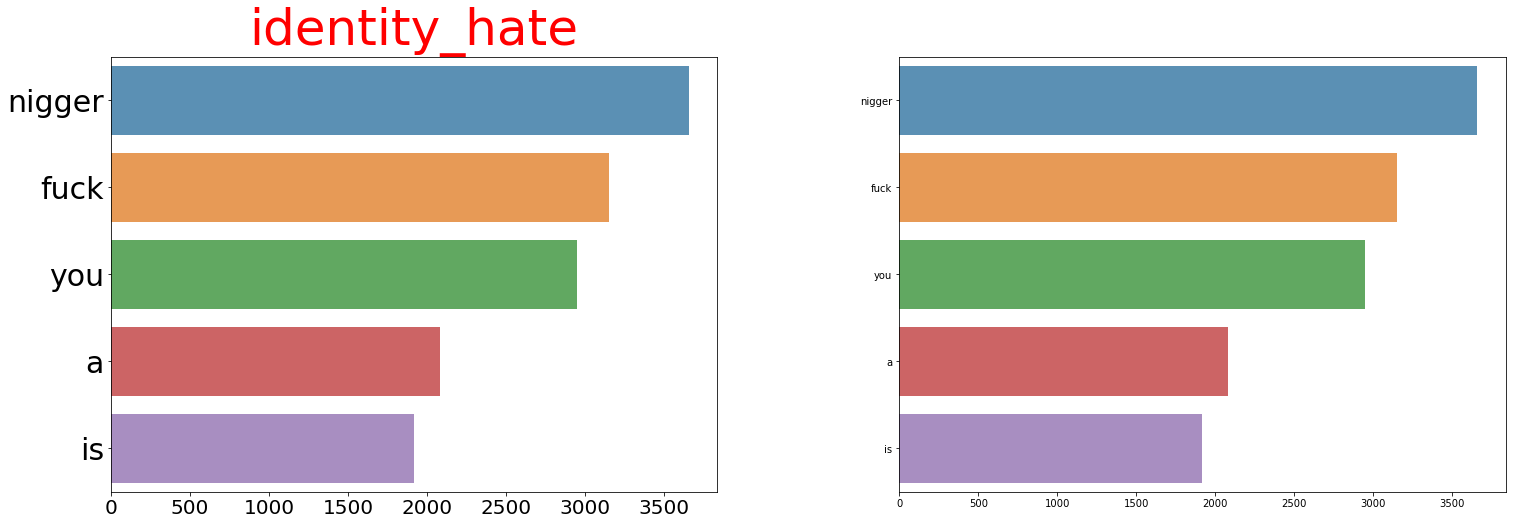

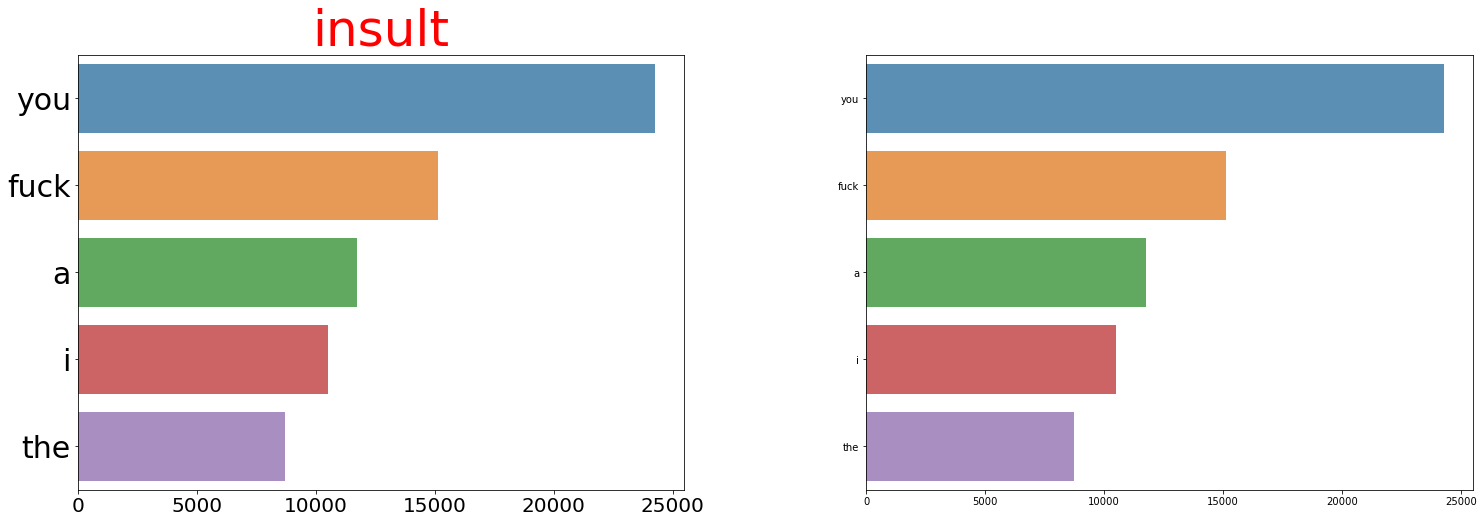

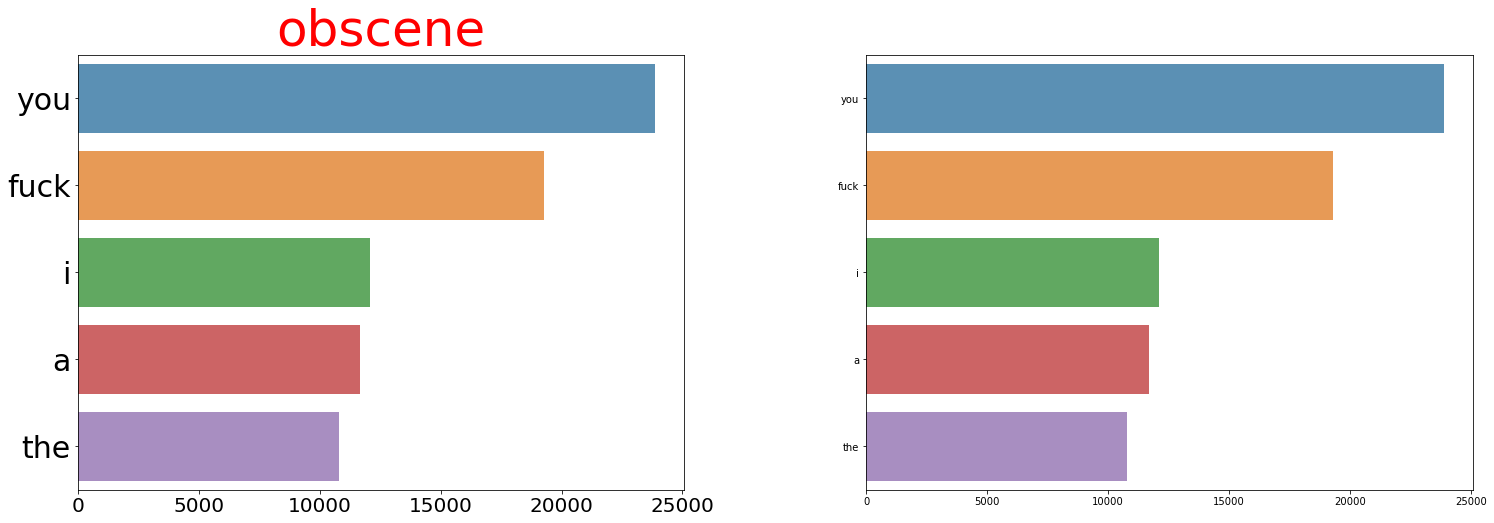

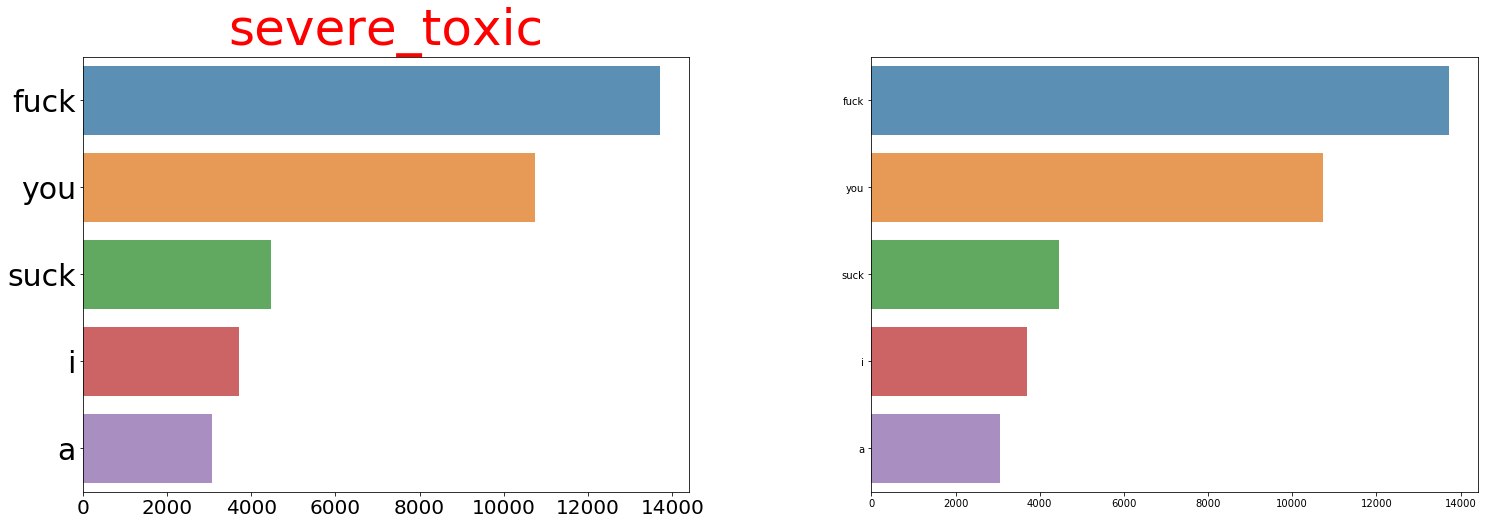

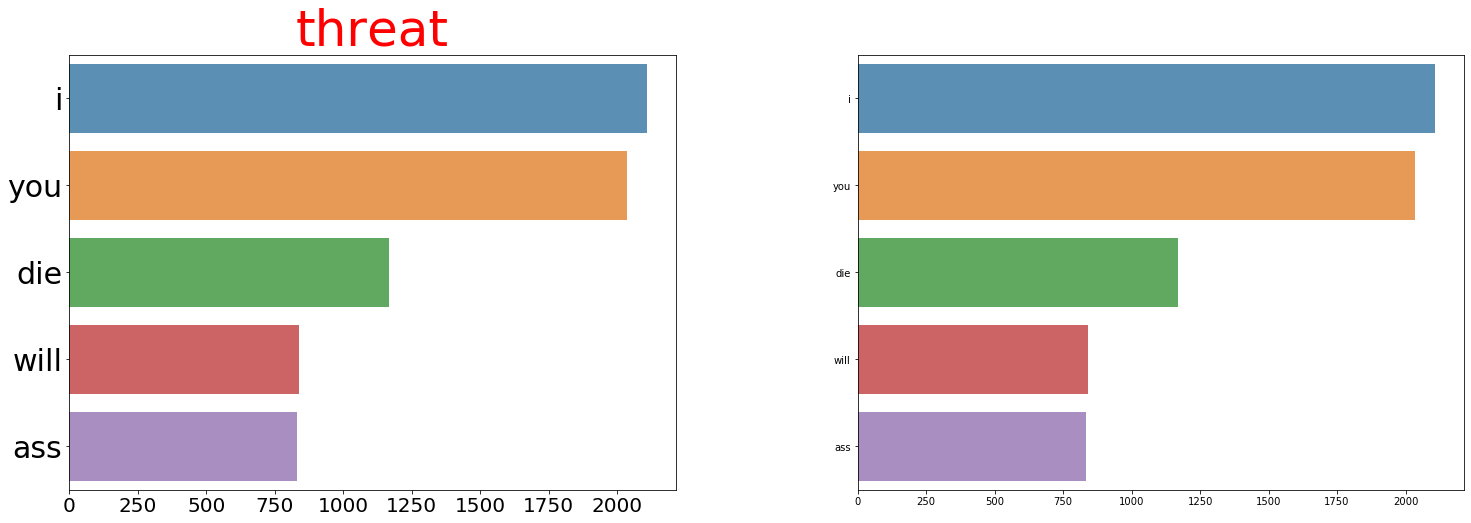

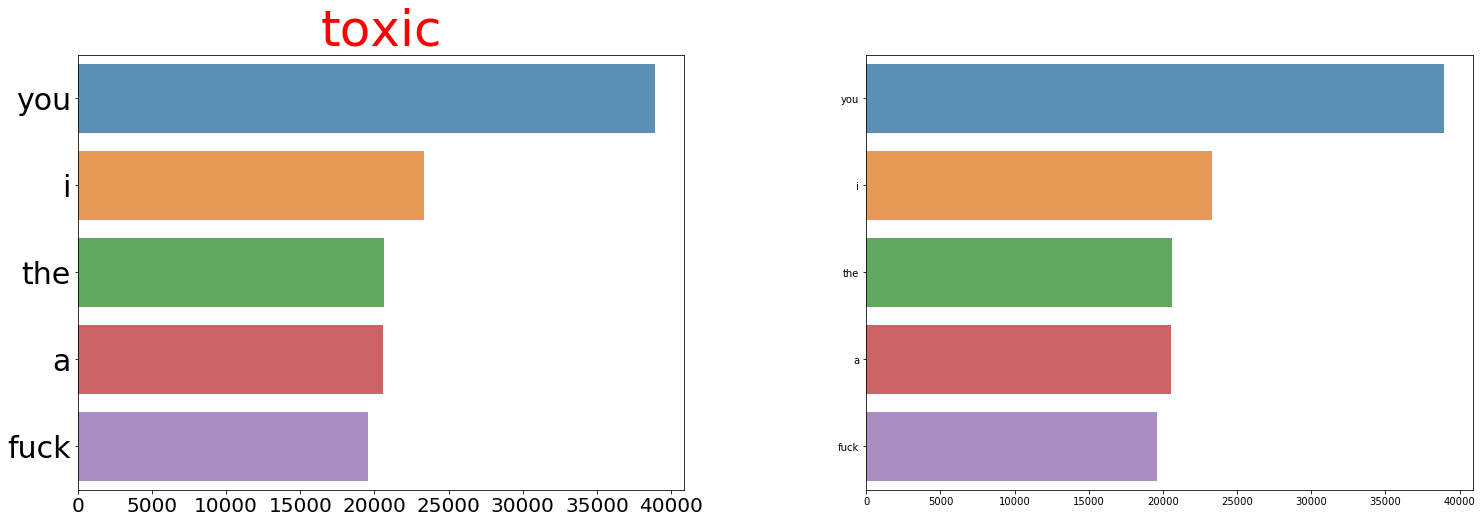

In [57]:
for t in types:
    sample = words_by_cat[t].sort_values(ascending=False).head()
    
    fig = plt.figure(figsize = (25, 8))
    axs = fig.subplots(1, 2, subplot_kw={}, gridspec_kw={"wspace":0.3})
    axs[0].set_title(t, fontdict={'size':50, 'color':'red'})
    #axs[0].set_xticklabels(labels=sample.index, fontdict={'size':30})
    
    b1 = sns.barplot(sample.values, sample.index, ax=axs[0], alpha = 0.8)
    b2 = sns.barplot(sample.values,  sample.index, ax=axs[1], alpha = 0.8)
    b1.tick_params('x', labelsize=20)
    b1.tick_params('y', labelsize=30)
    plt.show()


## Conclusions

Please, write down what did you learn and find during this task.  
What was the most difficult part?  
What did you enjoy?  
Suggest your improvements.  

In [ ]:
#### Your text here